In [1]:
import pandas as pd

df=pd.read_csv('housing.csv')

In [2]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
import sklearn 

In [4]:
import numpy as np
df["income_cat"]=pd.cut(df["median_income"],bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

In [5]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [6]:
##Using Stratified Sampling based on income_category

from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=39)

##split.split spits out indexes of the concerned data entries

for train_index,test_index in split.split(df,df["income_cat"]):
  strat_train_set=df.loc[train_index]
  strat_test_set=df.loc[test_index]
 

In [7]:
strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [8]:
strat_test_set["income_cat"].describe()

count     4128
unique       5
top          3
freq      1447
Name: income_cat, dtype: int64

In [9]:
##check them proportions @ income_cat
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [10]:
df["income_cat"].value_counts()/len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [11]:
##Observe..almost similar proportions
##NOTE::when startified sampling irl,we do it for the target values/target labels

In [12]:
##Dropping the income_cat so that it goes back to original data state

for set_ in (strat_train_set,strat_test_set):
  set_.drop("income_cat",axis=1,inplace=True)



In [13]:
##DISCOVER AND VISUALIZE DATA TO GAIN INSIGHTS

housing=strat_train_set.copy()

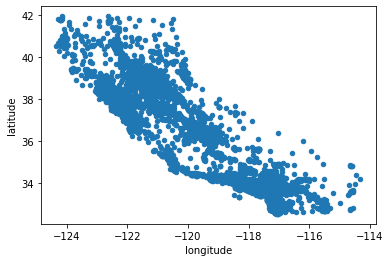

In [14]:
housing.plot(kind="scatter",x="longitude",y="latitude")

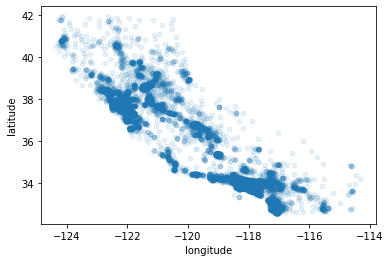

In [15]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

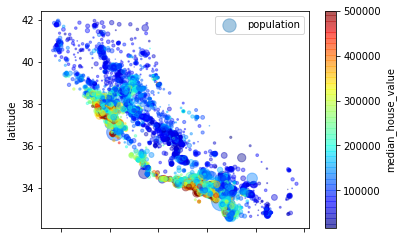

In [16]:
import matplotlib.pyplot as plt


housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",c="median_house_value",
             cmap=plt.get_cmap("jet"),colorbar=True)

In [17]:
##LOOKING FOR CORRELATIONS

corr_matrix=housing.corr()

In [18]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924109,-0.105148,0.047450,0.071904,0.104599,0.058697,-0.017627,-0.052051
latitude,-0.924109,1.000000,0.009313,-0.041160,-0.071269,-0.112965,-0.074972,-0.077854,-0.138915
housing_median_age,-0.105148,0.009313,1.000000,-0.357194,-0.314162,-0.293931,-0.298338,-0.126054,0.098754
total_rooms,0.047450,-0.041160,-0.357194,1.000000,0.930739,0.861343,0.920053,0.199966,0.138758
total_bedrooms,0.071904,-0.071269,-0.314162,0.930739,1.000000,0.880785,0.981622,-0.004335,0.055669
population,0.104599,-0.112965,-0.293931,0.861343,0.880785,1.000000,0.908252,0.006544,-0.021445
households,0.058697,-0.074972,-0.298338,0.920053,0.981622,0.908252,1.000000,0.015451,0.070942
median_income,-0.017627,-0.077854,-0.126054,0.199966,-0.004335,0.006544,0.015451,1.000000,0.687386
median_house_value,-0.052051,-0.138915,0.098754,0.138758,0.055669,-0.021445,0.070942,0.687386,1.000000


In [19]:
###NOTE:CORRELATION COEFFICIENTS CAPTURE ONLY THE LINEAR NATURE
##IF THERE IS SOME NON LINEAR RELATIONSHIP...IT'LL TOTALLY GO OVER THEIR HEAD


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e44a29450>,
      dtype=object)

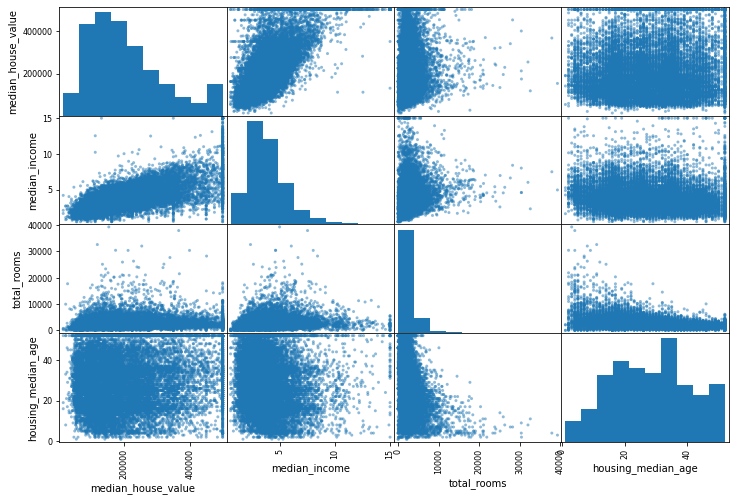

In [20]:
##USING SCATTER MATRIX


from pandas.plotting import scatter_matrix

attributes=["median_house_value","median_income","total_rooms","housing_median_age"]

scatter_matrix(housing[attributes],figsize=(12,8))

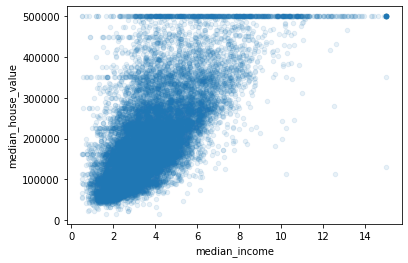

In [21]:
##scatter plot between median_house value and median_income looks promising

housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [22]:
##5 horizontal lines appear in the plot,we should remove those points before feeding it to our algo 

In [23]:
##DATA CLEANING

##Strategies::
##Remove the missing value rows
##Remove the atribute itself
##Set the missing values to something else based on some strategy


##housing.dropna(subset=["total_bedrooms"])......drops them rows
##housing.drop("total_bedrooms",axis=1)...drops da attribute
##median=housing["total_bedrooms"].fillna(median,inplace=True)

In [24]:
##HELLO Imputers

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

##now ocean_category is not numerical..so we gonna drop that

housing_num=housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [25]:
imputer.statistics_

array([-1.1850e+02,  3.4255e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1680e+03,  4.1000e+02,  3.5355e+00,  1.7980e+05])

In [26]:
housing_num.median().values

array([-1.1850e+02,  3.4255e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1680e+03,  4.1000e+02,  3.5355e+00,  1.7980e+05])

In [27]:
##Now the imputer has been trained
X=imputer.transform(housing_num)

In [28]:
##X is a numpy array

In [29]:
##WE can convert it to a dataframe by 
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

In [30]:
housing_tr.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [31]:
##WE dropped the ocean_proximity attribute as it wasn't numerical during imputer training

##lets convert it into a valid numerical form

##Strategies:OHE,Ordinal Encoding,Embedding

##Using OHE

from sklearn.preprocessing import OneHotEncoder

housing_cat=housing[["ocean_proximity"]]
cat_encoder=OneHotEncoder()

housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [32]:
##Sparse array-->stores the location of non-zero elements
##We can convert it into numpy
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [33]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [34]:
##Custom Estimators::

from sklearn.base import BaseEstimator,TransformerMixin
import numpy as np

rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6


class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
  def __init__(self,add_bedrooms_per_room=True):
    self.add_bedrooms_per_room=add_bedrooms_per_room

  def fit(self,X,y=None):
    return self

  def transform(self,X,y=None):
    rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
    population_per_household=X[:,population_ix]/X[:,households_ix]

    if self.add_bedrooms_per_room:
      bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
      return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]##np.c_---->stacks 1d arrays as columns into 2d arrays

    else:
      return np.c_[X,rooms_per_household,population_per_household]      


In [36]:
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)

In [42]:
housing_extra_attribs

array([[-117.6, 33.65, 4.0, ..., '<1H OCEAN', 6.461855670103093,
        3.296907216494845],
       [-121.6, 39.77, 23.0, ..., 'INLAND', 4.973626373626374,
        2.501098901098901],
       [-121.37, 38.64, 36.0, ..., 'INLAND', 5.4576271186440675,
        2.2542372881355934],
       ...,
       [-122.12, 37.65, 26.0, ..., 'NEAR BAY', 6.48, 3.44],
       [-120.84, 37.06, 14.0, ..., 'INLAND', 4.278409090909091,
        3.1136363636363638],
       [-119.32, 36.3, 15.0, ..., 'INLAND', 6.029473684210526,
        3.1157894736842104]], dtype=object)

In [37]:
housing.values

array([[-117.6, 33.65, 4.0, ..., 6.2464, 233900.0, '<1H OCEAN'],
       [-121.6, 39.77, 23.0, ..., 2.3403, 87300.0, 'INLAND'],
       [-121.37, 38.64, 36.0, ..., 4.6111, 139300.0, 'INLAND'],
       ...,
       [-122.12, 37.65, 26.0, ..., 2.375, 137500.0, 'NEAR BAY'],
       [-120.84, 37.06, 14.0, ..., 1.1301, 78500.0, 'INLAND'],
       [-119.32, 36.3, 15.0, ..., 2.9698, 93400.0, 'INLAND']],
      dtype=object)

In [39]:
housing.values[:,2]

array([4.0, 23.0, 36.0, ..., 26.0, 14.0, 15.0], dtype=object)

In [40]:
##TRANSFORMATION PIPELINES

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeLine=Pipeline([
                       ('imputer',SimpleImputer(strategy="median")),
                       ('attribs_adder',CombinedAttributesAdder()),
                       ('std_scaler',StandardScaler()),
])

housing_num_tr=num_pipeLine.fit_transform(housing_num)

In [43]:
housing_num_tr

array([[ 0.98081763, -0.92762854, -1.95409934, ...,  0.46002377,
         0.05810424, -0.79154092],
       [-1.01523601,  1.94124279, -0.44383844, ..., -0.19440523,
        -0.09715285,  0.08448594],
       [-0.90046293,  1.41153288,  0.58949797, ...,  0.01842765,
        -0.14531397, -0.96656603],
       ...,
       [-1.27472298,  0.94745076, -0.20537619, ...,  0.4680025 ,
         0.08602073, -0.70439252],
       [-0.63598582,  0.67087656, -1.15922518, ..., -0.50011776,
         0.02234928,  0.57169879],
       [ 0.12251456,  0.31461149, -1.07973776, ...,  0.26988955,
         0.02276933, -0.21716808]])

In [47]:
##We have been ignoring the categorical column "ocean_proximity" so far....let's take care of that using column transformer

from sklearn.compose import ColumnTransformer

num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]

full_pipeline=ColumnTransformer([
  ("num",num_pipeLine,num_attribs),
  ("cat",OneHotEncoder(),cat_attribs),
])

In [48]:
housing_prepared=full_pipeline.fit_transform(housing)

In [50]:
housing_prepared[0:4]

array([[ 0.98081763, -0.92762854, -1.95409934,  0.21604184, -0.08393186,
         0.14270669, -0.0451986 ,  1.252645  ,  0.23205114,  0.46002377,
         0.05810424, -0.79154092,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-1.01523601,  1.94124279, -0.44383844, -0.17428861, -0.10030535,
        -0.25552816, -0.12211944, -0.80650106, -1.03475851, -0.19440523,
        -0.09715285,  0.08448594,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [-0.90046293,  1.41153288,  0.58949797, -1.04412948, -1.15054798,
        -1.1236974 , -1.13747453,  0.39057758, -0.58541266,  0.01842765,
        -0.14531397, -0.96656603,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [-1.36953553,  1.07401861,  1.14590988, -0.24016528, -0.31082169,
        -0.46112446, -0.36313808,  0.15208966,  0.04453566,  0.19602354,
        -0.0987183 , -0.32186058,  0.        ,  0.        ,  0.        ,
         1.        

In [51]:
##SELECT AND TRAIN A MODEL
housing_labels=strat_train_set["median_house_value"].copy()
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
##LET'S check the model out

some_data=housing.iloc[:5]
some_labels=housing_labels[:5]
some_data_prepared=full_pipeline.transform(some_data)

In [54]:
print("Predictions:",lin_reg.predict(some_data_prepared))

Predictions: [233900.  87300. 139300. 212200. 157500.]


In [57]:
print("Targets:",list(some_labels))

Targets: [233900.0, 87300.0, 139300.0, 212200.0, 157500.0]


In [58]:
##rmse
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)

8.519579754789149e-11


In [ ]:
##DEFINITELY OVER FITTING..will test later on test DATA 

In [59]:
##Using decision tree regressor

from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [60]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_predictions,housing_labels)

In [61]:
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [62]:
##CROSS_VALIDATION

from sklearn.model_selection import cross_val_score

scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)



In [63]:
tree_rmse_scores=np.sqrt(-scores)

In [66]:
def display_scores(scores):
  print("Scores:",scores)
  print("Mean:",scores.mean())
  print("Standard Deviation:",scores.std())


display_scores(tree_rmse_scores)

Scores: [155.48876309 118.60774262  97.23618582 105.45393786  83.64066084
 101.26396831  92.44639287  89.21217877 113.98300744 106.08386109]
Mean: 106.34166987105957
Standard Deviation: 19.32786790781834


In [67]:
##SAME STUFF FOR LINEAR REGRESSION

lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.37502208e-10 1.11779969e-10 1.28215288e-10 6.04845175e-11
 2.73119116e-10 1.02910667e-10 1.75087670e-10 1.41123775e-10
 1.33299803e-10 8.33377632e-11]
Mean: 1.3468607766883987e-10
Standard Deviation: 5.528657128136448e-11


In [70]:
##Fine Tuning ma model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid=[
            
            {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
            {'bootstrap':[False],'n_estimators':[3,10],"max_features":[2,3,4]}
]

forest_reg=RandomForestRegressor()

grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [71]:
##BEST PARAMS
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [72]:
##BEST ESTIMATO
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [73]:
##evaluation_scores
cvres=grid_search.cv_results_


In [ ]:
cvres

In [76]:
##ANALYZE THE BEST MODELS AND THEIR FEATURE IMPORTANCES


feature_importance=grid_search.best_estimator_.feature_importances_

cat_encoder=full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attributes=num_attribs+["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]+cat_one_hot_attribs

sorted(zip(feature_importance,attributes),reverse=True)

[(0.7596260639405087, 'median_house_value'),
 (0.11444962724387979, 'median_income'),
 (0.06730331481733587, 'INLAND'),
 (0.01661563726656356, 'bedrooms_per_room'),
 (0.009811129337627907, 'latitude'),
 (0.009514957915450416, 'pop_per_hhold'),
 (0.006751608586164429, 'rooms_per_hhold'),
 (0.005495562671440759, '<1H OCEAN'),
 (0.00441610279012304, 'longitude'),
 (0.0028090040846345094, 'housing_median_age'),
 (0.0006864209268402603, 'population'),
 (0.0006729489819195036, 'total_rooms'),
 (0.0006663473171391295, 'households'),
 (0.0006204291223228154, 'total_bedrooms'),
 (0.00034173662850262276, 'NEAR BAY'),
 (0.00021820370412580192, 'NEAR OCEAN'),
 (9.04665420749336e-07, 'ISLAND')]